<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S3_Projet_ConversionRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Conversion Rate

In [0]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import du dataset
#df = pd.read_csv("conversion_data.csv",)
df = pd.read_csv('/content/drive/My Drive/conversion_data.csv')


In [362]:
#@title
# Affichage des premières lignes
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [363]:
# Caractéristiques du DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [364]:
# Principales statistiques
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [365]:
# Normalisation des valeurs extrêmes pour la variable"age"(>100)
df_temp=df[df.age<100]
median_age = df_temp["age"].median()
df.age[df.age > 100] = median_age
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [366]:
# Principales statistiques
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569307,0.685465,4.872966,0.032258
std,8.268932,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


# Visualisation des relations entre les données

Matrice de correlation

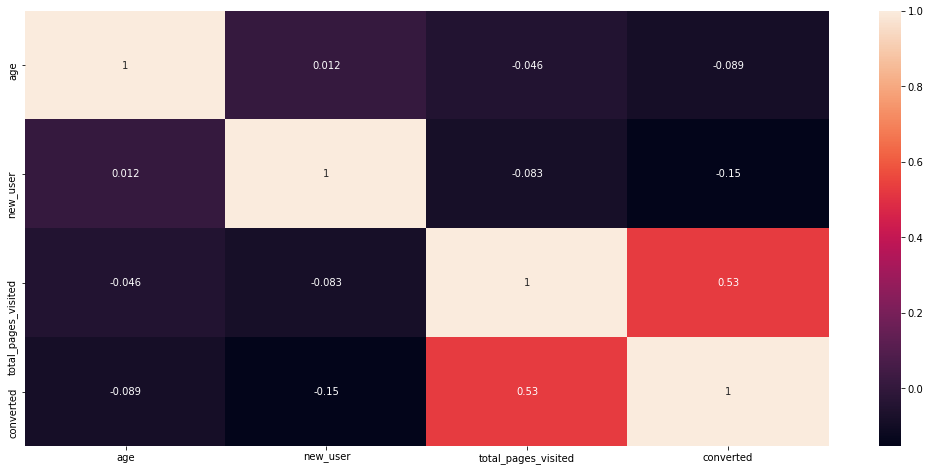

In [367]:
corr = df.corr()
f, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(corr, annot=True, ax=ax)

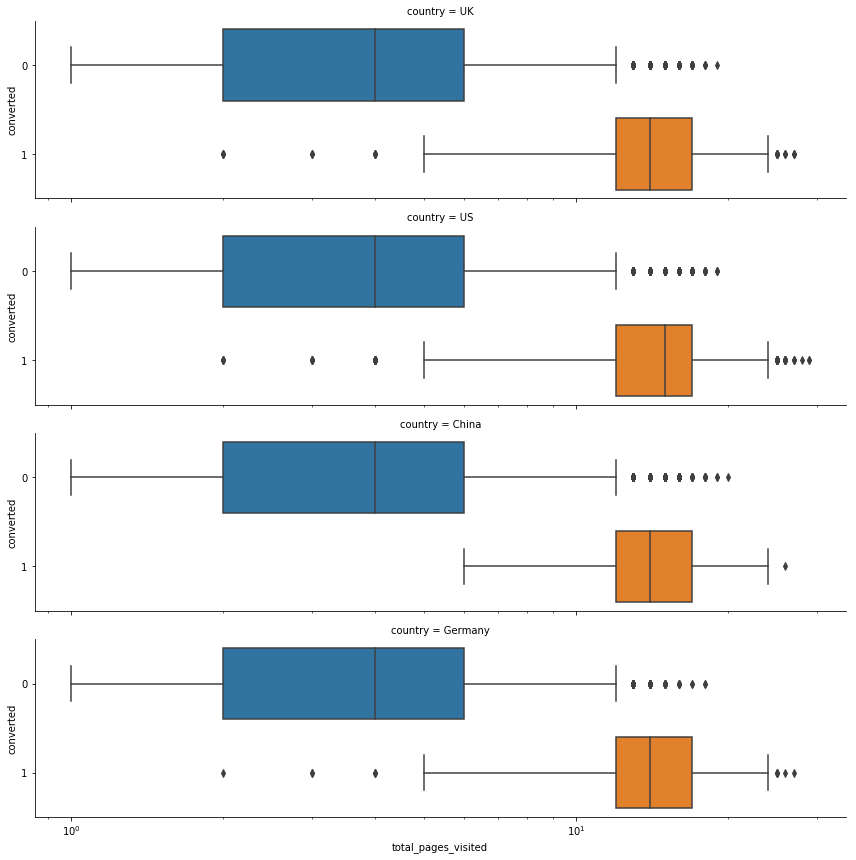

In [368]:
g = sns.catplot(x="total_pages_visited", y="converted", row="country",
                kind="box", orient="h", height=3, aspect=4,
                data=df)
g.set(xscale="log");

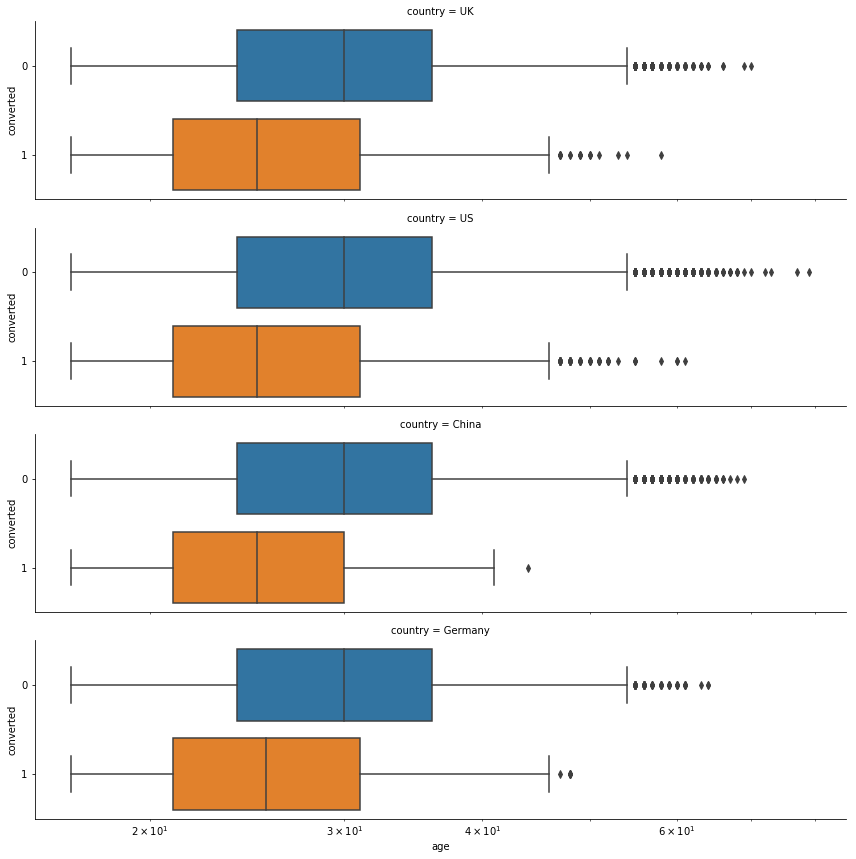

In [369]:
g = sns.catplot(x="age", y="converted", row="country",
                kind="box", orient="h", height=3, aspect=4,
                data=df)
g.set(xscale="log");

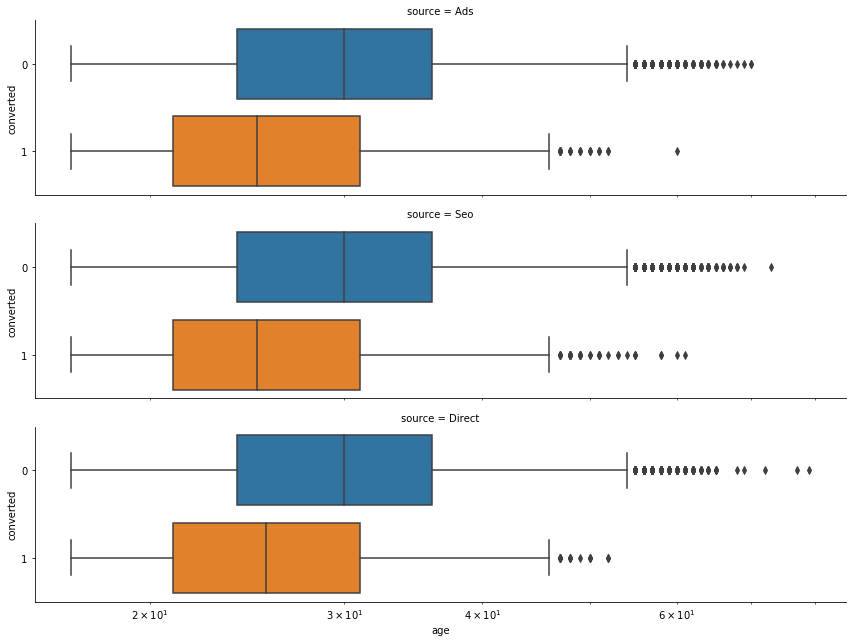

In [370]:
g = sns.catplot(x="age", y="converted", row="source",
                kind="box", orient="h", height=3, aspect=4,
                data=df)
g.set(xscale="log");

Regroupement des données

Essayons d'explorer quels facteurs jouent pour une conversion réussie

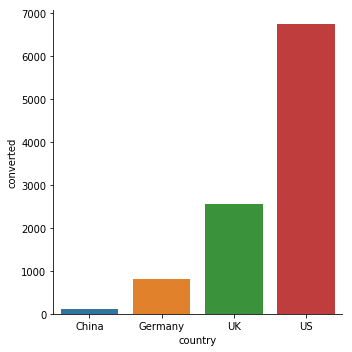

In [371]:
coun = df.groupby("country")["converted"].sum().reset_index(name='count')
coun.columns = ["country", "converted"]
sns.catplot(x="country", y="converted", kind="bar", data=coun)

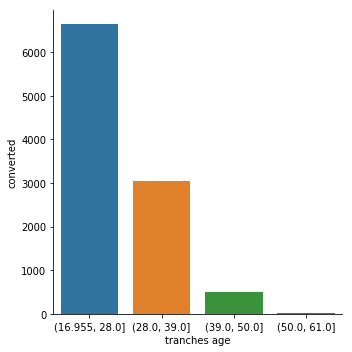

In [372]:
age = df[df['converted']==1]
age = age['age'].value_counts(bins=4)
#age = pd.DataFrame(age)
#age.columns = ["Conversions"]
#age.index
age = age.rename_axis('tranches age').reset_index(name='converted')
age["tranches age"] = age["tranches age"].tolist()
sns.catplot(x="tranches age", y="converted", kind="bar", data=age)

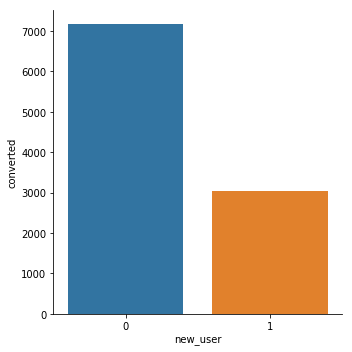

In [373]:
new = df.groupby("new_user")["converted"].sum().reset_index(name='count')
new.columns = ["new_user", "converted"]
sns.catplot(x="new_user", y="converted", kind="bar", data=new)

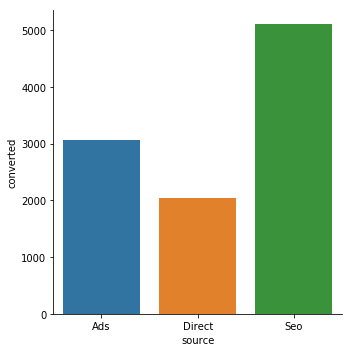

In [374]:
src = df.groupby("source")["converted"].sum().reset_index(name='count')
src.columns = ["source", "converted"]
sns.catplot(x="source", y="converted", kind="bar", data=src)

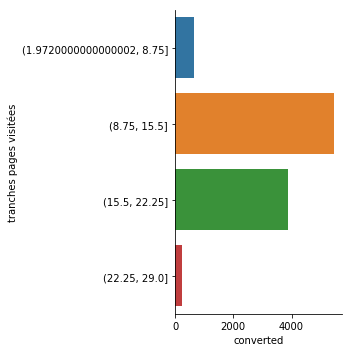

In [375]:
ttlp = df[df['converted']==1]
ttlp = ttlp['total_pages_visited'].value_counts(bins=4)
ttlp = ttlp.rename_axis('tranches pages visitées').reset_index(name='converted')
ttlp = ttlp.sort_values(by = "tranches pages visitées")
sns.catplot(y="tranches pages visitées", x="converted", kind="bar", orient= 'h', data=ttlp,)


# Normalisation et transformation des données

On crée de nouvelles variables pour les tranches d'âges. 

In [376]:
df["tr_age"] = ["1" if a<=28 else "2" if a<=39 else "3" if a<=50 else "4" for a in df.age ]
#df.sort_values(by = "tr_age", ascending = False)
df.groupby("tr_age").count()

,country,age,new_user,source,total_pages_visited,converted
tr_age,,,,,,
1,139347,139347,139347,139347,139347,139347
2,129627,129627,129627,129627,129627,129627
3,42503,42503,42503,42503,42503,42503
4,4723,4723,4723,4723,4723,4723


On crée également des tranches pour nombres de pages visitées

In [377]:
df["tr_pages"] = ["1" if a<=8.75 else "2" if a<=15.5 else "3" if a<=22.25 else "4" for a in df.total_pages_visited]
df.groupby("tr_pages").count()

,country,age,new_user,source,total_pages_visited,converted,tr_age
tr_pages,,,,,,,
1,277061,277061,277061,277061,277061,277061,277061
2,34801,34801,34801,34801,34801,34801,34801
3,4113,4113,4113,4113,4113,4113,4113
4,225,225,225,225,225,225,225


In [378]:
# supprimer la colonne age et total pages

df = df.drop("age", axis = 1)
df = df.drop("total_pages_visited", axis = 1)
df.groupby("tr_age").count()

,country,new_user,source,converted,tr_pages
tr_age,,,,,
1,139347,139347,139347,139347,139347
2,129627,129627,129627,129627,129627
3,42503,42503,42503,42503,42503
4,4723,4723,4723,4723,4723


In [379]:
#prendre un échantillon converted == 0 
df_original = df
df_temp = df[df["converted"]==0].iloc[:(len(df[df["converted"]==1])*2),:]
#df_temp2 = df[df["converted"]==1].iloc[:(int((len(df[df["converted"]==1]))*2/3)),:]
df = df.drop(df[df["converted"]==0].index)
df = df.append(df_temp)
#df = df_temp.append(df_temp2)
len(df)


30600

In [380]:
#Dummification

df = pd.get_dummies(df, drop_first= True)
#df = pd.get_dummies(df)
df.describe()

,new_user,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo,tr_age_2,tr_age_3,tr_age_4,tr_pages_2,tr_pages_3,tr_pages_4
count,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000
mean,0.567190,0.333333,0.052908,0.182418,0.593562,0.221176,0.492451,0.373497,0.108235,0.011503,0.241928,0.127190,0.007353
std,0.495473,0.471412,0.223854,0.386195,0.491176,0.415046,0.499951,0.483740,0.310682,0.106636,0.428258,0.333191,0.085435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [381]:
#stocker la colonne "converted" dans la variable y
y = df["converted"]
#Construire un nouveau dataset sans la colonne converted
X = df.drop(columns = ["converted","source_Seo"])
X.head()

,new_user,country_Germany,country_UK,country_US,source_Direct,tr_age_2,tr_age_3,tr_age_4,tr_pages_2,tr_pages_3,tr_pages_4
54,1,0,0,1,1,0,0,0,0,1,0
72,0,0,0,1,0,1,0,0,1,0,0
87,0,0,0,1,1,0,0,0,0,1,0
130,0,0,0,1,0,0,0,0,0,1,0
182,0,0,0,1,0,0,0,0,1,0,0


In [382]:
#calcul chi2 et p-value
from sklearn import feature_selection
feat = feature_selection.chi2(X, y)
chi2 = pd.DataFrame(index=X.columns, data = feat[0], columns=["Chi2 Score"])
chi2["P-value"] = feat[1]
chi2 = chi2.sort_values(by = "Chi2 Score",  ascending = False)
chi2

,Chi2 Score,P-value
tr_pages_3,7664.462487,0.000000e+00
tr_pages_2,5453.748210,0.000000e+00
new_user,1955.551999,0.000000e+00
tr_age_3,507.229620,2.540817e-112
tr_pages_4,450.000000,7.212994e-100
country_UK,383.072734,2.666772e-85
tr_age_2,232.032943,2.147831e-52
country_Germany,212.242434,4.452895e-48
country_US,113.777707,1.457671e-26
tr_age_4,113.762784,1.468683e-26


# Regression Logistique

In [0]:
#Split des données
from sklearn.model_selection import train_test_split
#Split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42
                                                    )

In [384]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [386]:
classifier.score(X_test,y_test)

0.9326797385620915

Matrice de confusion / courbe ROC

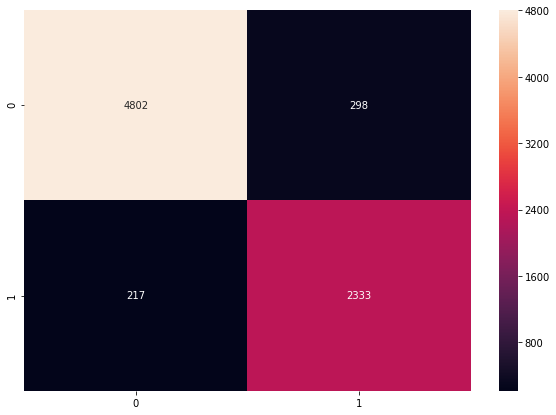

In [387]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(cm, annot=True, fmt="d", ax = ax)

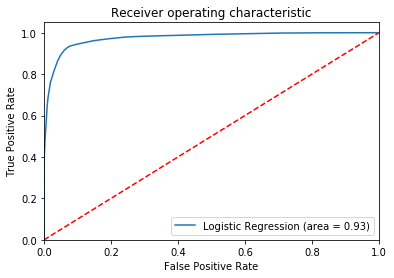

In [388]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, classifier.predict(X))
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [389]:
from sklearn.model_selection import cross_val_score

#calcul la moyenne des scores de cross validation

cross_val_score(classifier,X, y, cv=10).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.9314379084967321

On revient à l'échantillon complet et on teste le modèle

In [390]:
df_tree = df_original
df_original = pd.get_dummies(df_original, drop_first= True)

#stocker la colonne "converted" dans la variable y
y = df_original["converted"]
#Construire un nouveau dataset sans la colonne converted
X = df_original.drop(columns = ["converted","source_Seo"])
y_pred = classifier.predict(X)
classifier.score(X,y)

0.9376881720430108

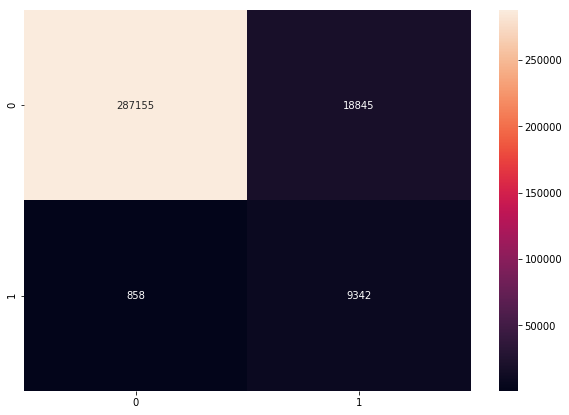

In [391]:
cm = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", ax = ax)

In [392]:
classifier.score(X_train,y_train)

0.9311111111111111

# Arbre de décision

In [393]:
df_original = df_tree
df_temp = df_tree[df_tree["converted"]==0].iloc[:(len(df_tree[df_tree["converted"]==1])*2),:]
df_tree = df_tree.drop(df_tree[df_tree["converted"]==0].index)
df_tree = df_tree.append(df_temp)
#df_temp2 = df_tree[df_tree["converted"]==1].iloc[:(int((len(df_tree[df_tree["converted"]==1]))*2/3)),:]
#df_tree = df_temp.append(df_temp2)
len(df_tree)

30600

In [394]:
df_tree = pd.get_dummies(df_tree, drop_first= True)
#stocker la colonne "converted" dans la variable y
y = df_tree["converted"]
#Construire un nouveau dataset sans la colonne converted
X = df_tree.drop(columns = ["converted","source_Seo"])
X.head()

,new_user,country_Germany,country_UK,country_US,source_Direct,tr_age_2,tr_age_3,tr_age_4,tr_pages_2,tr_pages_3,tr_pages_4
54,1,0,0,1,1,0,0,0,0,1,0
72,0,0,0,1,0,1,0,0,1,0,0
87,0,0,0,1,1,0,0,0,0,1,0
130,0,0,0,1,0,0,0,0,0,1,0
182,0,0,0,1,0,0,0,0,1,0,0


In [0]:
#@title
#Split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42
                                                    )

In [396]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

rtc = DecisionTreeClassifier()
params = {'max_depth' : np.arange(1,10),
         'min_samples_leaf' : [1, 5, 10, 20]}

grid =  GridSearchCV(estimator=rtc, param_grid= params, cv = 10)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 1}

In [397]:
grid.best_estimator_.score(X_test, y_test)

0.9294117647058824

In [398]:
grid.best_estimator_.score(X_train, y_train)

0.9318394024276377

In [399]:
#dtcG = DecisionTreeClassifier(criterion='gini')
dtcG = DecisionTreeClassifier(max_depth= 9, min_samples_leaf= 5)
dtcG.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [400]:
y_pred = dtcG.predict(X_test)
dtcG.score(X_test, y_test)

0.9298474945533769

In [401]:
dtcG.score(X_train, y_train)

0.9316059757236228

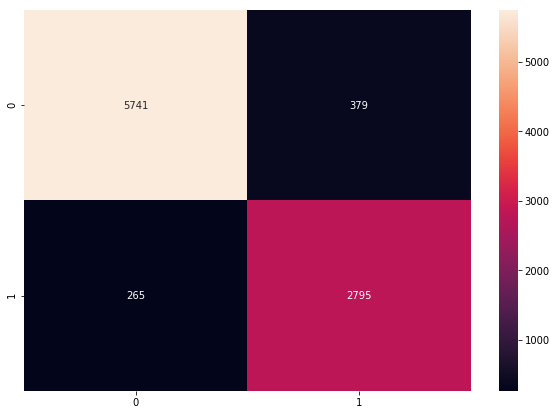

In [402]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(cm, annot=True, fmt="d", ax = ax)

Performance sur échantillon complet

In [403]:
df_tree = df_original
df_original = pd.get_dummies(df_original, drop_first= True)

#stocker la colonne "converted" dans la variable y
y = df_original["converted"]
#Construire un nouveau dataset sans la colonne converted
X = df_original.drop(columns = ["converted","source_Seo"])
y_pred = dtcG.predict(X)
dtcG.score(X,y)

0.9359677419354838

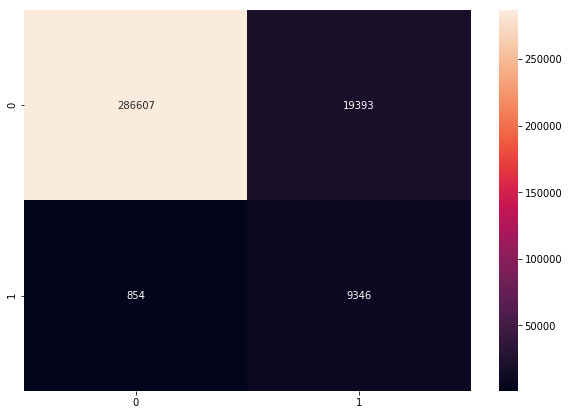

In [404]:
cm = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(cm, annot=True, fmt="d", ax = ax)

In [405]:
dtcG.score(X_train,y_train)

0.9316059757236228

# Random Forest

In [0]:
df_original = df_tree
df_temp = df_tree[df_tree["converted"]==0].iloc[:(len(df_tree[df_tree["converted"]==1])*2),:]
df_tree = df_tree.drop(df_tree[df_tree["converted"]==0].index)
df_tree = df_tree.append(df_temp)



In [407]:
df_tree = pd.get_dummies(df_tree, drop_first= True)
#stocker la colonne "converted" dans la variable y
y = df_tree["converted"]
#Construire un nouveau dataset sans la colonne converted
X = df_tree.drop(columns = ["converted","source_Seo"])
X.head()

,new_user,country_Germany,country_UK,country_US,source_Direct,tr_age_2,tr_age_3,tr_age_4,tr_pages_2,tr_pages_3,tr_pages_4
54,1,0,0,1,1,0,0,0,0,1,0
72,0,0,0,1,0,1,0,0,1,0,0
87,0,0,0,1,1,0,0,0,0,1,0
130,0,0,0,1,0,0,0,0,0,1,0
182,0,0,0,1,0,0,0,0,1,0,0


In [0]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42
                                                    )

In [409]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators'      : np.arange(10,50),
    'max_depth'         : np.arange(1,10)
    #'min_sample_split'  : np.arange(2,10)
    #'n_estimators'      : np.arange(1,50),
    #'max_depth'         : [8, 9, 10, 11, 12],
    #'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

clfG = GridSearchCV(RandomForestClassifier(), parameters)#, cv=10, n_jobs=-1
clfG.fit(X_train, y_train)

print(clfG.score(X_test, y_test))
print(clfG.best_params_)'''

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\n\nparameters = {\n    'n_estimators'      : np.arange(10,50),\n    'max_depth'         : np.arange(1,10)\n    #'min_sample_split'  : np.arange(2,10)\n    #'n_estimators'      : np.arange(1,50),\n    #'max_depth'         : [8, 9, 10, 11, 12],\n    #'random_state'      : [0],\n    #'max_features': ['auto'],\n    #'criterion' :['gini']\n}\n\nclfG = GridSearchCV(RandomForestClassifier(), parameters)#, cv=10, n_jobs=-1\nclfG.fit(X_train, y_train)\n\nprint(clfG.score(X_test, y_test))\nprint(clfG.best_params_)"

In [410]:
clf=RandomForestClassifier(n_estimators=25)

clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.9302832244008714

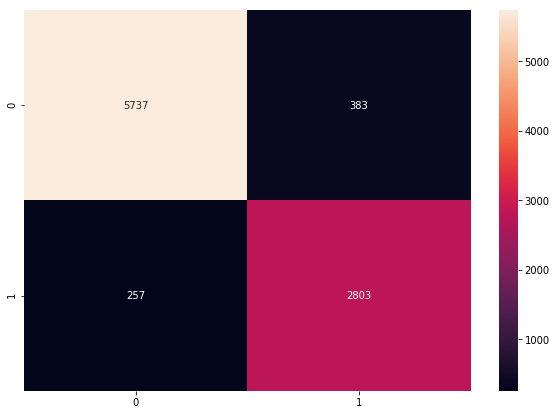

In [411]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(cm, annot=True, fmt="d", ax = ax)

In [412]:
df_tree = df_original
df_original = pd.get_dummies(df_original, drop_first= True)

#stocker la colonne "converted" dans la variable y
y = df_original["converted"]
#Construire un nouveau dataset sans la colonne converted
X = df_original.drop(columns = ["converted","source_Seo"])
y_pred = clf.predict(X)
clf.score(X,y)

0.9354996837444656

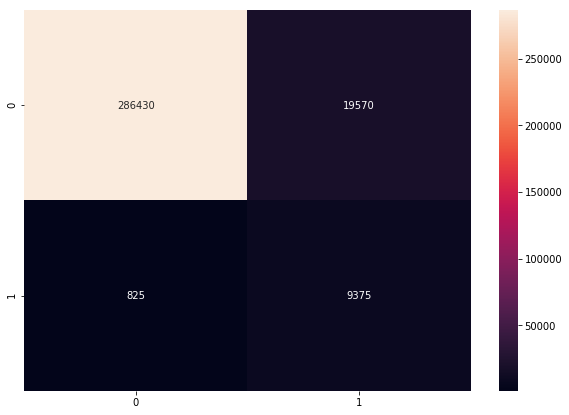

In [413]:
cm = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(cm, annot=True, fmt="d", ax = ax)

In [414]:
clf.score(X_train,y_train)

0.9318394024276377

Le modèle le plus simple

In [415]:
y_test.mean()

0.3333333333333333

In [0]:
#clf.predict(X_test)
#misclass = X_test[(y==1)&(clf.base_estimator_.predict(X_test)==0)]
misclass = X_test[(y==1)&(y_pred==0)]
misclass

# Conclusion

La régression Logistique avec un score de Vrais Positifs de 91.58%

---

L'arbre de décision donne un score de 91.6%

---

Le Rondom Forest donne un score de 91.9%
